#### 사전준비

In [9]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

#### 데이터 준비

#### 패션  MNIST

In [1]:
!pip install tensorflow

     -------------------------------------- 444.1/444.1 MB 6.1 MB/s eta 0:00:00
     ------------------------------------- 895.5/895.5 kB 11.4 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 17.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
     -------------------------------------- 438.7/438.7 kB 9.3 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 

In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

- 텐서플로 1.x 개발된 오픈소스나 참조할 것은 거의(!) 수정 해야 텐서플로 2.x 사용가능

In [5]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_input, train_target), (test_input, test_target) = load_data()

In [6]:
# 훈련, 테스트  데이터셋  확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### 훈련세트 입력 확인

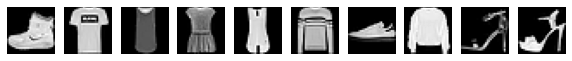

In [14]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray')
    axs[i].axis('off')
plt.show()


-0         1           2           3        4          5        6            7          8       9
-티셔츠   바지       스웨터       드레스   코트      샌달     셔츠         스니커즈   가방    앵클부츠

In [13]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

#### MNIST 데이터 갯수

In [15]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

0~255 수를 0~1 사이의 값으로 정규화

In [16]:
train_scaled = train_input / 255.0
# 2차원 이미지 값을 1차원 배열값으로 변경
train_scaled = train_scaled.reshape(-1, 28*28)

In [17]:
print(train_scaled.shape)

(60000, 784)


##### 확률적 경사하강법

SGDClassifier

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [20]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [22]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [27]:
import tensorflow.keras as keras

In [31]:
model = keras.Sequential()

dense = keras.layers.Dense(10, input_shape=(784,), activation='softmax')
model.add(dense)

#### 모델 실생(컴파일)

In [33]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

#### 모델 훈련

In [34]:
model.fit(train_scaled,train_target, epochs = 5) # epochs 훈련 횟수

Epoch 1/5
1500/1500 [==============================] - 2s 941us/step - loss: 0.6079 - accuracy: 0.7950
Epoch 2/5
1500/1500 [==============================] - 1s 955us/step - loss: 0.4784 - accuracy: 0.8381
Epoch 3/5
1500/1500 [==============================] - 1s 987us/step - loss: 0.4579 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 1s 968us/step - loss: 0.4450 - accuracy: 0.8514
Epoch 5/5
1500/1500 [==============================] - 1s 988us/step - loss: 0.4370 - accuracy: 0.8549


In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4510 - accuracy: 0.8490


[0.4509528875350952, 0.8489999771118164]